In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
import pdb
import matplotlib
# import some stuff
from __future__ import division, print_function

from scipy.stats import gaussian_kde
import scipy.stats as st
import os
import pandas as pd
import seaborn as sns

In [7]:
num_mixtures =8
radius = 0.5
thetas = np.linspace(0, 2 * np.pi, num_mixtures + 1)[:num_mixtures]
xs, ys = radius * np.sin(thetas), radius * np.cos(thetas)
means_x = list([np.array([a,b]) for a,b in zip(xs,ys)])
std = 0.05
u_mean=tuple(zip(xs, ys))
u_cov=tuple([(std, std)] * num_mixtures)
def gmm(x):
    for i in range(8):
        d=st.multivariate_normal(u_mean[0],[[std,0.0],[0.0,std]])
        if i==0:
            ans=d.pdf(x)/8.0
        else:
            ans+=d.pdf(x)/8.0
    return ans

In [8]:
def f1(pos):
    return pos[0]**2+pos[1]**2
def pot1(z):
    a=0.5*((np.linalg.norm(z,axis=0)-2.0)/0.4)**2
    b=np.log(np.exp(-0.5*((z[0]-2.0)/0.6)**2)+np.exp(-0.5*((z[0]+2.0)/0.6)**2))
    ans=a-b
    return np.exp(-ans)
def pot1_hard(z):
    a=0.5*((np.linalg.norm(z,axis=0)-3.0)/0.4)**2
    b=np.log(np.exp(-0.5*((z[0]-3.0)/0.6)**2)+np.exp(-0.5*((z[0]+3.0)/0.6)**2))
    ans=a-b
    return np.exp(-ans)
def w1(z):
    return np.sin(2*3.14159*z[0]/4)
def w2(z):
    return 3*np.exp(-0.5*((z[0]-1)/0.6)**2)
def pot2(z):
    ans=0.5*((z[1]-w1(z))/0.4)**2
    return np.exp(-ans)
def pot3(z):
    ans=-np.log(np.exp(-0.5*((z[1]-w1(z))/0.35)**2)+np.exp(-0.5*((z[1]-w1(z)+w2(z))/0.35)**2))
    return np.exp(-ans)

def function_to_sample(func,bbox):
    xx, yy = np.mgrid[bbox[0]:bbox[1]:100j, bbox[2]:bbox[3]:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    f = func(positions)
    p=positions.T
    q=np.array([[0,0]])
    scale=30
    for i in range(len(f)):
#         if i%2000==0:
#             print(i)
        temp=[p[i]]
        n=min(int(f[i]*scale),30)
        temp2=np.tile(temp,(n,1))
        q=np.concatenate((q,temp2),axis=0)
    return q
def plot_sample(q,bbox):
    xx, yy = np.mgrid[bbox[0]:bbox[1]:100j, bbox[2]:bbox[3]:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    p=positions.T
    q=np.concatenate((q,p),axis=0)
    fig = plt.figure(figsize=(20,5))   
    # transformed distribution with samples
    ax = plt.subplot(1, 1, 1, aspect='equal')
    ax.hist2d(q[:, 0], q[:, 1], range=[[-5, 5], [-5, 5]], bins=100)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    plt.show()

In [15]:
def plot_result(data,title,range_limit,step=1,alpha=0.5):
    bbox=[range_limit[0],range_limit[1],range_limit[0],range_limit[1]]
    df = pd.DataFrame(data)  
    fig=plt.figure(figsize=[5,5])
    g = sns.jointplot(x=0, y=1, data=df, kind="kde", cmap='Blues',ratio=1000, n_levels=30, kernel="biw" , bw="silverman" , stat_func=None,joint_kws={'shade_lowest':False}, xlim=range_limit, ylim=range_limit )
    g.plot_joint(plt.scatter, c="grey", s=30, linewidth=1, marker="o",alpha=alpha)
#     g.ax_joint.collections[0].set_alpha(0)
    plt.yticks([])
    plt.xticks([])
    g.set_axis_labels("", "") 
    g.savefig(title+'.pdf')
    plt.show()

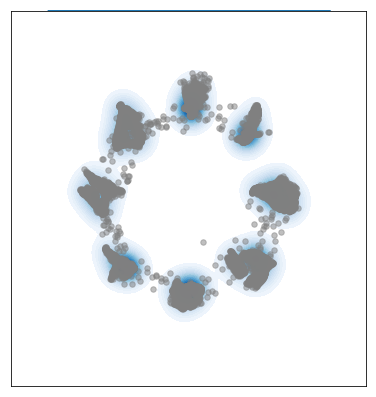

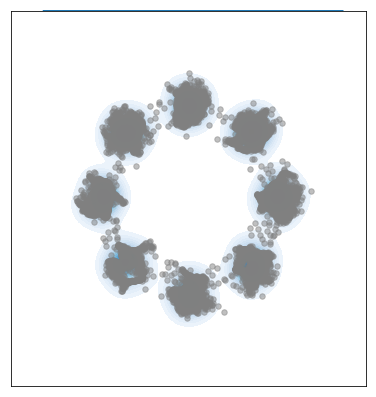

In [18]:
range_limit = [-1,1]
name='gmm'
data = np.load('./gmm.npy', )
plot_result(data[:10000],name,range_limit)
data = np.load('./gmm_EN.npy', )
plot_result(data[:10000],name+'_EN',range_limit)